In [1]:
%load_ext lab_black
%load_ext autotime
import drnb.embed.pipeline as pl

time: 7.34 s (started: 2023-04-04 22:40:31 -07:00)


Uniform Manifold Approximation with Two-phase Optimization (UMATO: [arxiv](https://arxiv.org/abs/2205.00420), [github](https://github.com/hyungkwonko/umato)) is a UMAP like method that lays out data in three stages: first, hubs (points with lots of neighbors) are laid out, then non-hubs, then outliers, with slightly different treatment of each, the idea being that the hubs represent the global layout of the data the best, while outliers tend to distort the layout. The authors claim that this gives better global preservation across multiple datasets.

Parameters you might want to play with:

* `n_neighbors=50`: larger than the default `15` with UMAP. 
* `hub_num=300`: the number of items in the dataset which are part of the global embedding.
* `global_n_epochs=None` (defaults to 100): number of epochs for the global hub embedding.
* `local_n_epochs=None` (defaults to 50): number of epochs for the local (non-hub but not outlier) embedding.
* `global_learning_rate=0.0065`: learning rate for the global embedding stage.
* `local_learning_rate=0.01`: learning rate for the local embedding stage.
* `gamma=0.1` This exists in the UMAP code base (in the API as `repulsion_strength`) but is rarely changed from its default value of 1 (which is like not using it). `gamma` is used in the UMATO code in a similar way. It is smaller than the default UMAP value (also to reduce the effect of hub interactions in the non-hub layout code), but the learning rates are even more reduced so it's not entirely clear to me what the overall effect would be.
* `init="pca"`. PCA initialization. Or: 
    * `"random"` (Gaussian with standard deviation 0.05)
    * `"spectral"` (the [sklearn SpectralEmbedding](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.SpectralEmbedding.html) method)
    * or user-defined coordinates (although non-hub coordinates are ignored). 
    
    In the PCA, random and user-defined case, the coordinates are normalized to 0-1 by dividing by the largest value (so in the `"random"` case this changes the standard deviation to closer to 0.19).


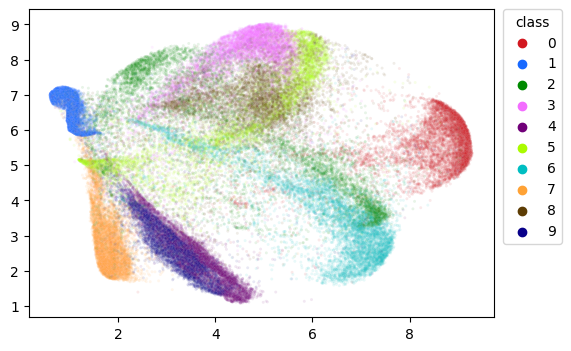

[EvalResult(eval_type='RTE', label='rte-5-euclidean', value=0.6717857142857144, info={'metric': 'euclidean', 'ntpp': 5}),
 EvalResult(eval_type='RPC', label='rpc-5-euclidean', value=0.5277269213933966, info={'metric': 'euclidean', 'ntpp': 5}),
 EvalResult(eval_type='NNP', label='nnp-15-noself-euclidean', value=0.06402095238095237, info={'metric': 'euclidean', 'n_neighbors': 15}),
 EvalResult(eval_type='NNP', label='nnp-50-noself-euclidean', value=0.10447142857142858, info={'metric': 'euclidean', 'n_neighbors': 50}),
 EvalResult(eval_type='NNP', label='nnp-150-noself-euclidean', value=0.158432, info={'metric': 'euclidean', 'n_neighbors': 150})]

time: 1min 8s (started: 2023-04-04 22:50:37 -07:00)


In [10]:
pl.standard_eval(method="umato", dataset="mnist")